In [1]:
import eigencharacter as ec
import pickle
import matplotlib.pyplot as plt

In [23]:
emb_path = ec.get_resource_path("", "gensim_kv_fasttext_tc.pkl")
with emb_path.open("rb") as fin:
    emb = pickle.load(fin)
    

In [3]:
chfreq_path = ec.get_resource_path("", "as_chFreq.pickle")
with chfreq_path.open("rb") as fin:
    chfreq = pickle.load(fin)
    chars = sorted(chfreq.keys(), key=chfreq.get, reverse=True)
    freq_chars = chars[:5000]

In [4]:
m_path = ec.get_resource_path('', 'character_M.pkl')
with m_path.open('rb') as fin:
    M = pickle.load(fin)

In [5]:
lexicon_sub = [x for x in freq_chars if x in emb]

In [6]:
M_char2id = {char: idx for idx, char in enumerate(freq_chars)}
emb_dataset = ec.EmbeddingDataset(emb, lexicon_sub, M, M_char2id)

In [11]:
emb.vectors.shape

(100001, 300)

蔣


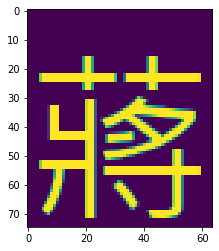

In [7]:
test_idx = 1560
print(lexicon_sub[test_idx])
plt.imshow(ec.recon(emb_dataset[test_idx][0], 64))

In [8]:
train_loader, dev_loader = ec.load_embedding_data(emb, freq_chars, M, 0.8, 0.2)

In [9]:
len(dev_loader)

10

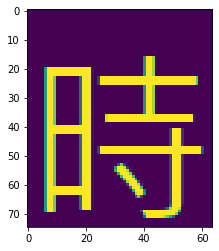

In [10]:
plt.imshow(ec.recon(M[:,20], 64))

In [11]:
next(iter(train_loader))

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64),
 tensor([[ 0.1283,  1.3896, -0.3997,  ...,  0.2507,  1.7346,  0.2475],
         [ 0.3677,  1.3760, -0.6701,  ...,  0.3982,  1.4807, -0.2316],
         [ 0.3444,  1.7697, -0.8495,  ...,  0.4086,  1.6567,  0.3213],
         ...,
         [-0.0371,  1.0273, -0.7493,  ...,  0.2453,  0.9169,  0.2153],
         [ 0.1558,  1.4625, -0.8016,  ...,  0.0725,  1.1963,  0.0651],
         [ 0.1798,  1.5692, -0.5445,  ...,  0.5929,  1.4867,  0.1517]],
        dtype=torch.float64)]

In [24]:
cv_path = ec.get_resource_path('', 'charac_coeff.pkl')
if cv_path.exists():
    with open(cv_path, "rb") as fin:
        cv_itos, cv_stoi, cv_vectors = pickle.load(fin)

In [13]:
cv_vectors.shape

(5000, 500)

In [15]:
svd_dataset = ec.SvdDataset(emb, cv_vectors, cv_itos)

In [19]:
m_path = ec.get_exp_dir('MF_Model', 'mf_svd_100')
m_info = m_path / 'MF_Model-mf_svd_100.json'
m_model = m_path / 'MF_Model-mf_svd_100.pth'

In [8]:
m_info.exists()

True

In [10]:
import json
fin = m_info.open()
params = json.load(fin)
fin.close()

In [11]:
params

{'mode': 'mean2form',
 'form': 'svd',
 'form_dim': 100,
 'emb_dim': 300,
 'hidden_dim': 100}

In [21]:
import torch
from eigencharacter.neural import MF_Model

In [18]:
model = MF_Model(params['emb_dim'], params['form_dim'], params['hidden_dim'])

In [22]:
model.load_state_dict(torch.load(m_model))

<All keys matched successfully>